In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

food = pd.read_csv("college_food.csv")
print(len(food.columns))
#gender = food["Gender"]

#make a column that has gender in String format
gender_mapping = {1: 'female', 2: 'male'}
food['Gender_str'] = food['Gender'].map(gender_mapping)

food.head()


61


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight,Gender_str
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1,1165.0,345,car racing,5,1,1315,187,male
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,2,725.0,690,Basketball,4,2,900,155,female
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.,female
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240",female
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,4,940.0,500,Softball,4,2,760,190,female


In [31]:
food.loc[73, 'GPA'] = pd.to_numeric(re.search(r'\d+\.\d+', str(food.loc[73, 'GPA'])).group(), errors='coerce')

# Convert the 'GPA' column to numeric, coercing errors to NaN
food['GPA'] = pd.to_numeric(food['GPA'], errors='coerce')

food['GPA'].replace(' ', pd.NA, inplace=True)
# Convert the 'GPA' column to numeric, coercing errors to NaN
food['GPA'] = pd.to_numeric(food['GPA'], errors='coerce')


food["GPA"].to_csv("GPA_List")
food[]

In [9]:
def to_vector_of_strings(dataframe, column_name):
    # Split words using commas and periods
    words_list = dataframe[column_name].str.lower().str.replace('.', ',').str.split(',').explode().str.strip().tolist()
    # Create a new DataFrame with a row for each word
    vector_of_words = pd.DataFrame({
        '{}_word'.format(column_name): words_list
    })
    
    return vector_of_words

comfort_food = to_vector_of_strings(food,"comfort_food")
print(comfort_food)


    comfort_food_word
0                none
1           chocolate
2               chips
3           ice cream
4       frozen yogurt
..                ...
393             pizza
394        chocolates
395             pizza
396          and ritz
397                  

[398 rows x 1 columns]


comfort_food_word
ice cream              43
pizza                  37
chocolate              25
chips                  23
cookies                17
                       13
mac and cheese         12
pasta                   8
cake                    7
popcorn                 7
candy                   6
french fries            6
pretzels                5
chinese food            4
soup                    4
fried chicken           3
fruit                   3
fries                   3
mashed potatoes         3
mozzarella sticks       3
burgers                 3
donuts                  3
mac n cheese            3
chinese                 3
cookie dough            2
macaroni and cheese     2
and ice cream           2
grapes                  2
cereal                  2
brownies                2
chicken noodle soup     2
lasagna                 2
mcdonalds               2
fast food               2
fruit snacks            2
dark chocolate          2
rice                    2
spaghetti           

c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


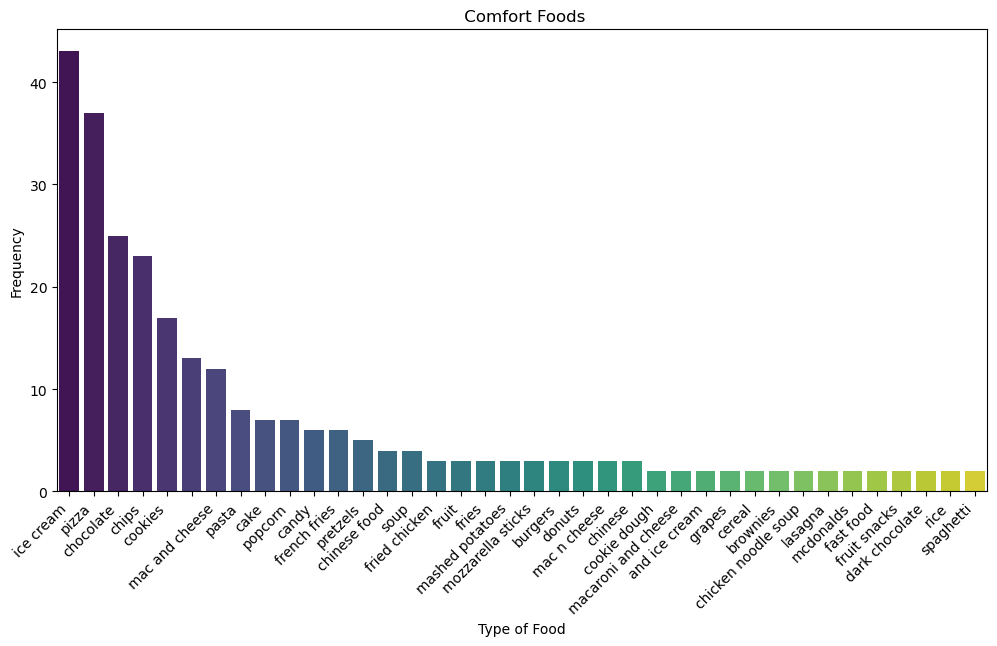

In [10]:
#graph

word_counts = comfort_food['comfort_food_word'].value_counts()
word_counts_filtered = word_counts[word_counts > 1]
print(word_counts_filtered)

# there is 38 foods that occur more than once
# Use Seaborn for the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=word_counts_filtered.index, y=word_counts_filtered.values, palette="viridis")
plt.title(' Comfort Foods')
plt.xlabel('Type of Food')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


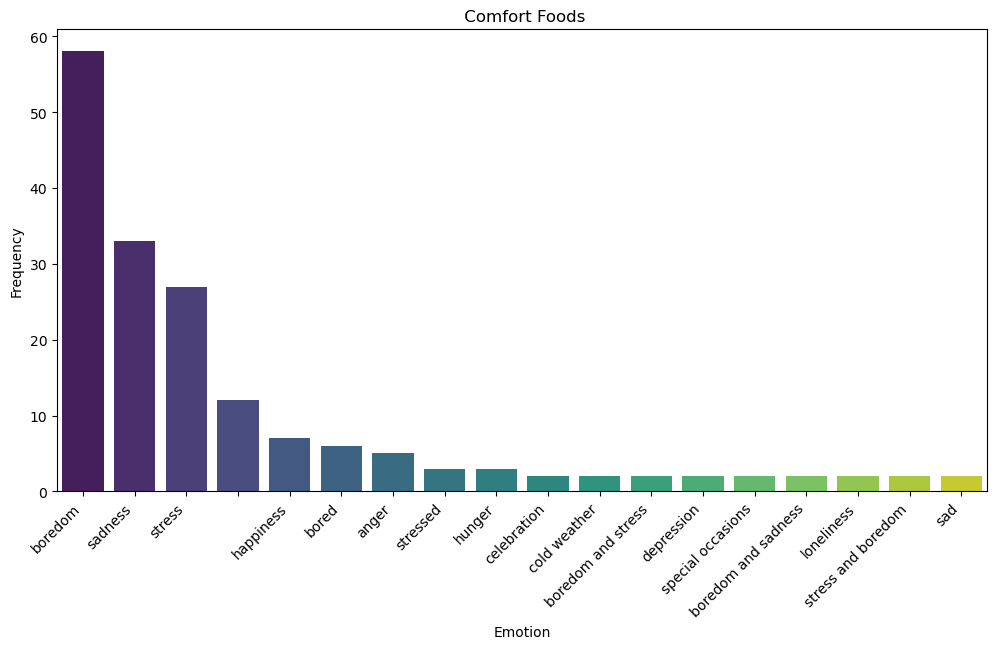

In [11]:
comfort_food_reasons = to_vector_of_strings(food, "comfort_food_reasons")
comfort_food_reasons

# Count the occurrences of each reason
reasons_counts = comfort_food_reasons['comfort_food_reasons_word'].value_counts()
# Filter reasons that occur more than once and reset the index
reasons_filtered = reasons_counts[reasons_counts > 1].reset_index(name='count')
reasons_filtered

plt.figure(figsize=(12, 6))
sns.barplot(x="comfort_food_reasons_word", y= "count", data=reasons_filtered, palette="viridis")
plt.title(' Comfort Foods')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()





In [35]:
reasons_filtered

,comfort_food_reasons_word,count
0,bored,58
1,sad,33
2,stress,27
3,,12
4,happy,7
5,bored,6
6,anger,5
7,stressed,3
8,hunger,3
9,happy,2


In [26]:

def replace_with_synonym(dataframe, column_name, words_to_replace):
    # Replace words using the specified mapping
    for original_word, replacement_word in words_to_replace.items():
        dataframe[column_name] = dataframe[column_name].replace(original_word, replacement_word)

    # Group and sum the occurrences of each word
    grouped_data = dataframe.groupby(column_name, as_index=False).sum()

    return grouped_data

words_to_replace = {'boredom': 'bored', 'sadness': 'sad', 'stress and boredom': 'stress', 'happiness': 'happy', 'sad': 'sad', 
                    'depression' : 'sad', 'cold weather': 'sad', 'celebration' : 'happy', 'boredom and stress' : "bored",
                    "loneliness" : "sad"}

graph_me = replace_with_synonym(reasons_filtered,'comfort_food_reasons_word',words_to_replace)
graph_me
# graph_me = graph_me.sort_values("count", ascending= False)

# plt.figure(figsize=(12, 6))
# sns.barplot(x="comfort_food_reasons_word", y= "count", data = graph_me, palette="viridis")
# plt.title(' Comfort Foods Reasons')
# plt.xlabel('Emotion')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45, ha='right')  
# plt.show()



   comfort_food_reasons_word  count
0                      bored     58
1                        sad     33
2                     stress     27
3                                12
4                      happy      7
5                      bored      6
6                      anger      5
7                   stressed      3
8                     hunger      3
9                      happy      2
10                       sad      2
11                     bored      2
12                       sad      2
13         special occasions      2
14       boredom and sadness      2
15                       sad      2
16                    stress      2
17                       sad      2


Part 3: Make facet- wrapped graphs split by gender_str for vitamins, sports, veggies, and weight

c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='exercise', ylabel='count'>

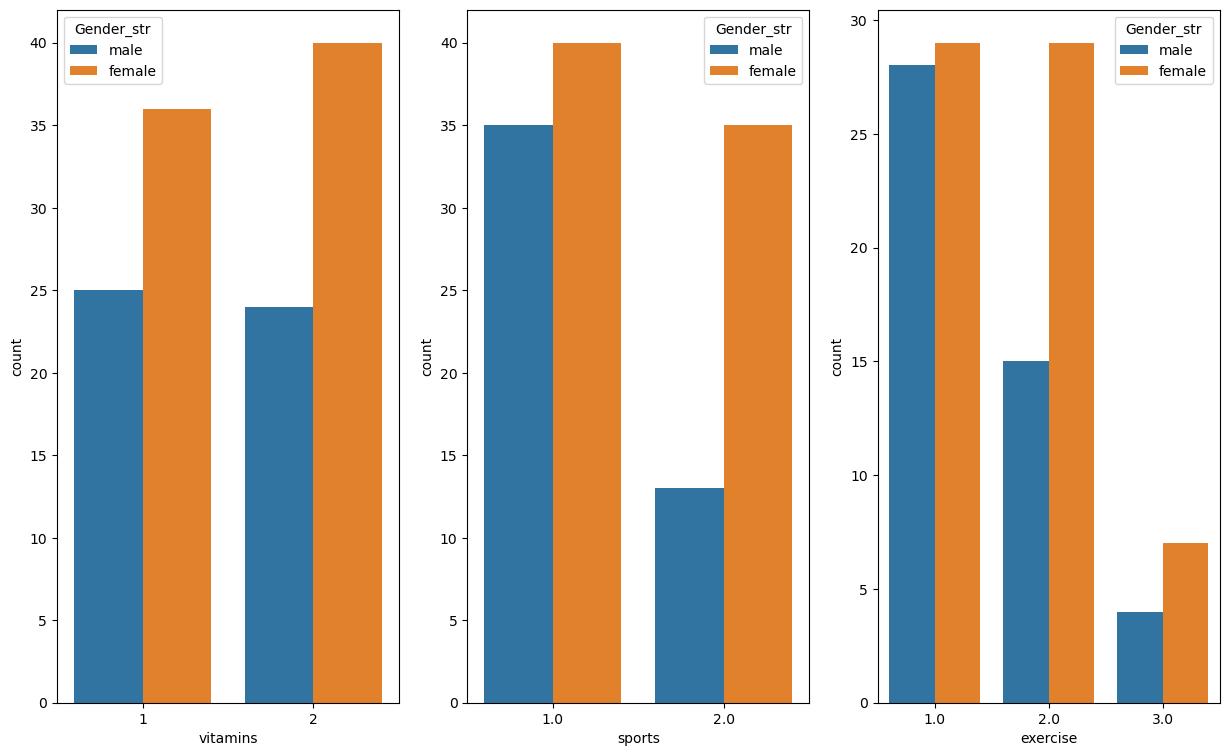

In [40]:
vitamins = food[food["vitamins"] == 1]

fig, axes = plt.subplots(1, 3, figsize = (15, 9))

sns.countplot(data=food, x=food["vitamins"], hue= food["Gender_str"],ax=axes[0])
sns.countplot(data=food, x=food["sports"], hue = food["Gender_str"], ax=axes[1])
sns.countplot(data=food, x=food["exercise"], hue=food["Gender_str"])


c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='exercise', ylabel='count'>

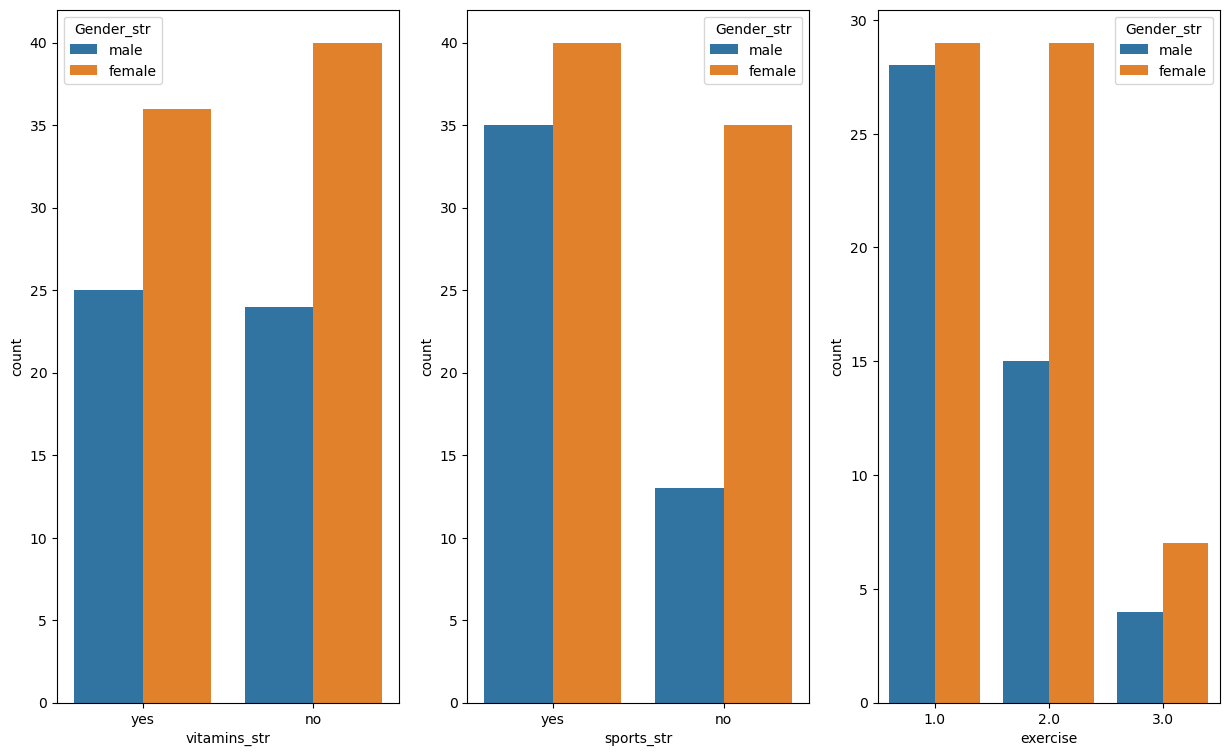

In [41]:
def binary_to_string(dataset, column_name, string_one, string_two):
    mapping = {1: string_one, 2: string_two}
    dataset[column_name + '_str'] = dataset[column_name].map(mapping)

# Example usage:
binary_to_string(food, 'Gender', 'female', 'male')
binary_to_string(food, 'vitamins', 'yes', 'no')
binary_to_string(food, 'sports', 'yes', 'no')



c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mattj\anaconda3\envs\stat386\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

<Axes: xlabel='exercise', ylabel='count'>

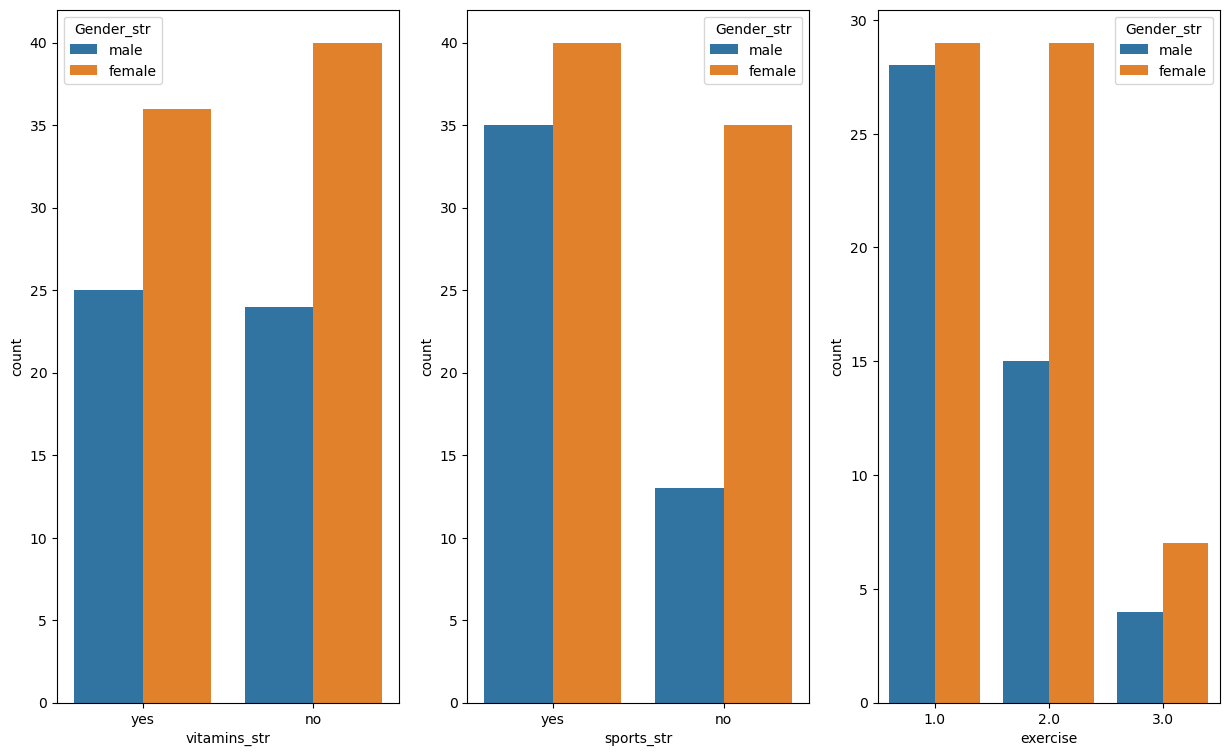

In [42]:
fig, axes = plt.subplots(1, 3, figsize = (15, 9))

sns.countplot(data=food, x=food["vitamins_str"], hue= food["Gender_str"],ax=axes[0])
sns.countplot(data=food, x=food["sports_str"], hue = food["Gender_str"], ax=axes[1])
sns.countplot(data=food, x=food["exercise"], hue=food["Gender_str"])